# Fitting of tunneling spectroscopy measurments
In this notebook, some pyusadel routines are used to fit NS tunneling spectroscopy data.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

from pyusadel import UsadelProblem, fit_nis_ts, thermal_broadening, trivial_diffops

In [2]:
data_file_url = "resources/example_nsts_data.dat"
data = np.loadtxt(data_file_url)
e_ax_exp = data[:, 0]
dos_exp = data[:, 1]

Text(0, 0.5, '$G$ ($2e^2/\\hbar$)')

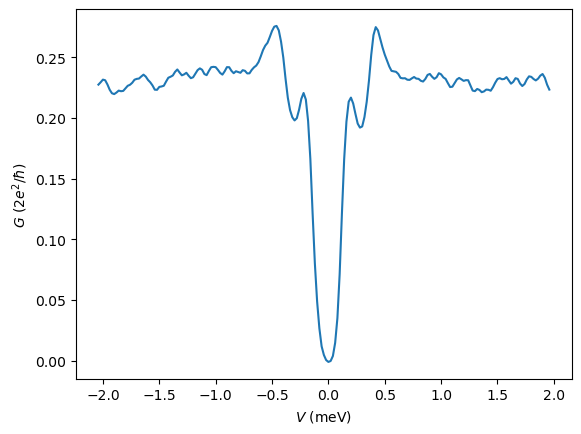

In [3]:
# Plot the data
fig, ax = plt.subplots()
ax.plot(e_ax_exp, dos_exp)
ax.set_xlabel(r"$V$ (meV)")
ax.set_ylabel(r"$G$ ($2e^2/\hbar$)")

In [4]:
k_B = 86.17e-6
G_N = np.mean(dos_exp[-10:])
T = 40 * k_B
Gamma = 1e-6

In [5]:
params = dict(
    Delta=(0, 0.260, 0.350),
    h=(0.0, 0.040, 0.300),
    G_N=G_N,
    T=T,
    tau_sf_inv=(0.0, 0.04, 0.1),
    tau_so_inv=(0.0, 0.03, 0.1),
    Gamma=Gamma,
    x_N=0.0,
)

popt, pcov = fit_nis_ts(
    e_ax_exp=e_ax_exp,
    dos_exp=dos_exp,
    **params,
    verbose=True,
    tol=1e-8,
)

Delta = 0.2600, h = 0.0400, tau_sf_inv = 0.0400, tau_so_inv = 0.0300, 
Delta = 0.2600, h = 0.0400, tau_sf_inv = 0.0400, tau_so_inv = 0.0300, 
Delta = 0.2600, h = 0.0400, tau_sf_inv = 0.0400, tau_so_inv = 0.0300, 
Delta = 0.2600, h = 0.0400, tau_sf_inv = 0.0400, tau_so_inv = 0.0300, 
Delta = 0.2600, h = 0.0400, tau_sf_inv = 0.0400, tau_so_inv = 0.0300, 
   Iteration     Total nfev        Cost      Cost reduction    Step norm     Optimality   
       0              1         1.5517e-01                                    8.98e-01    
Delta = 0.2720, h = 0.0552, tau_sf_inv = 0.0503, tau_so_inv = 0.0352, 
Delta = 0.2720, h = 0.0552, tau_sf_inv = 0.0503, tau_so_inv = 0.0352, 
Delta = 0.2720, h = 0.0552, tau_sf_inv = 0.0503, tau_so_inv = 0.0352, 
Delta = 0.2720, h = 0.0552, tau_sf_inv = 0.0503, tau_so_inv = 0.0352, 
Delta = 0.2720, h = 0.0552, tau_sf_inv = 0.0503, tau_so_inv = 0.0352, 
       1              2         1.1000e-01      4.52e-02       2.25e-02       3.84e-01    
Delta = 0.2809, h

In [6]:
Delta, h, tau_sf_inv, tau_so_inv = popt

up = UsadelProblem(
    Nsites=1,
    diff_ops=trivial_diffops(),
    h_x=np.array([0.0]) + h,
    h_y=np.array([0.0]),
    h_z=np.array([0.0]),
    tau_sf_inv=np.array([0.0]) + tau_sf_inv,
    tau_so_inv=np.array([0.0]) + tau_so_inv,
    D=0,
    T=T,
    Gamma=Gamma,
)
up.Delta = np.array([Delta])

up.set_real_omega_ax(-2.5, 2.5, 601)
up.solve_spectral()

In [7]:
DOS_fit = thermal_broadening(up.get_omega_ax_r(), G_N * up.get_ldos()[:, 0], T)
DOS_fitu = thermal_broadening(
    up.get_omega_ax_r(), G_N * up.get_spin_resolved_ldos("x")[0][:, 0], T
)
DOS_fitd = thermal_broadening(
    up.get_omega_ax_r(), G_N * up.get_spin_resolved_ldos("x")[1][:, 0], T
)

/home/andmai/miniconda3/envs/qenv310/lib/python3.10/site-packages/pyusadel/utils.py:48: RuntimeWarning: overflow encountered in cosh
  return y_f(e - x * T) / (2 * (1 + np.cosh(x)))
/home/andmai/miniconda3/envs/qenv310/lib/python3.10/site-packages/pyusadel/utils.py:48: RuntimeWarning: overflow encountered in multiply
  return y_f(e - x * T) / (2 * (1 + np.cosh(x)))


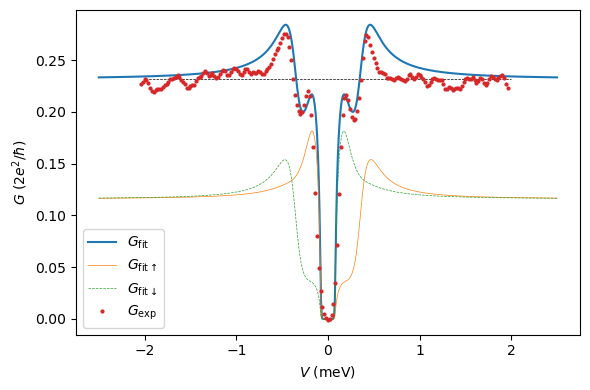

In [8]:
# Plot the fitting together with the experimental data

fig, ax = plt.subplots(figsize=(6, 4))
ax.hlines([G_N], -2, 2, "k", linestyles="--", linewidths=0.5)
ax.plot(up.get_omega_ax_r(), DOS_fit, "-", label=r"$G_\mathrm{fit}$")
ax.plot(
    up.get_omega_ax_r(),
    DOS_fitu,
    "-",
    linewidth=0.5,
    label=r"$G_{\mathrm{fit} \uparrow}$",
)
ax.plot(
    up.get_omega_ax_r(),
    DOS_fitd,
    "--",
    linewidth=0.5,
    label=r"$G_{\mathrm{fit} \downarrow}$",
)
ax.plot(
    e_ax_exp,
    dos_exp,
    ".",
    markersize=4,
    label=r"$G_\mathrm{exp}$",
)


ax.set_xlabel(r"$V$ (meV)")
ax.set_ylabel(r"$G$ ($2e^2/\hbar$)")

ax.legend()

fig.tight_layout()